# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [2]:
import numpy as np
import math
import pandas as pd

import seaborn as sns

import sklearn.linear_model
from sklearn import neighbors,metrics
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler

from sklearn.model_selection import train_test_split

from IPython.display import display
import matplotlib.pyplot as plt


from sklearn.dummy import DummyClassifier




## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
data = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
data = data.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
data.sample(10)

,gender,age,income,family_members,insurance_benefits
2223,1,23.0,50100.0,0,0
4686,0,25.0,34800.0,1,0
3221,1,32.0,47500.0,1,0
698,0,32.0,41900.0,1,0
90,1,23.0,35700.0,2,0
1168,1,31.0,38600.0,0,0
4508,0,28.0,48500.0,2,0
1622,0,37.0,54000.0,1,0
3410,0,24.0,33900.0,2,0
1391,1,29.0,40100.0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial
# escribe tu conversión aquí si lo deseas:
data['age'] = data['age'].astype(int)

In [8]:
# comprueba que la conversión se haya realizado con éxito
print(data['gender'].head())
print(data['age'].head())

0    1
1    0
2    0
3    0
4    1
Name: gender, dtype: int64
0    41
1    46
2    29
3    21
4    28
Name: age, dtype: int64


In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

In [10]:
print(data.describe())

            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000  


## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

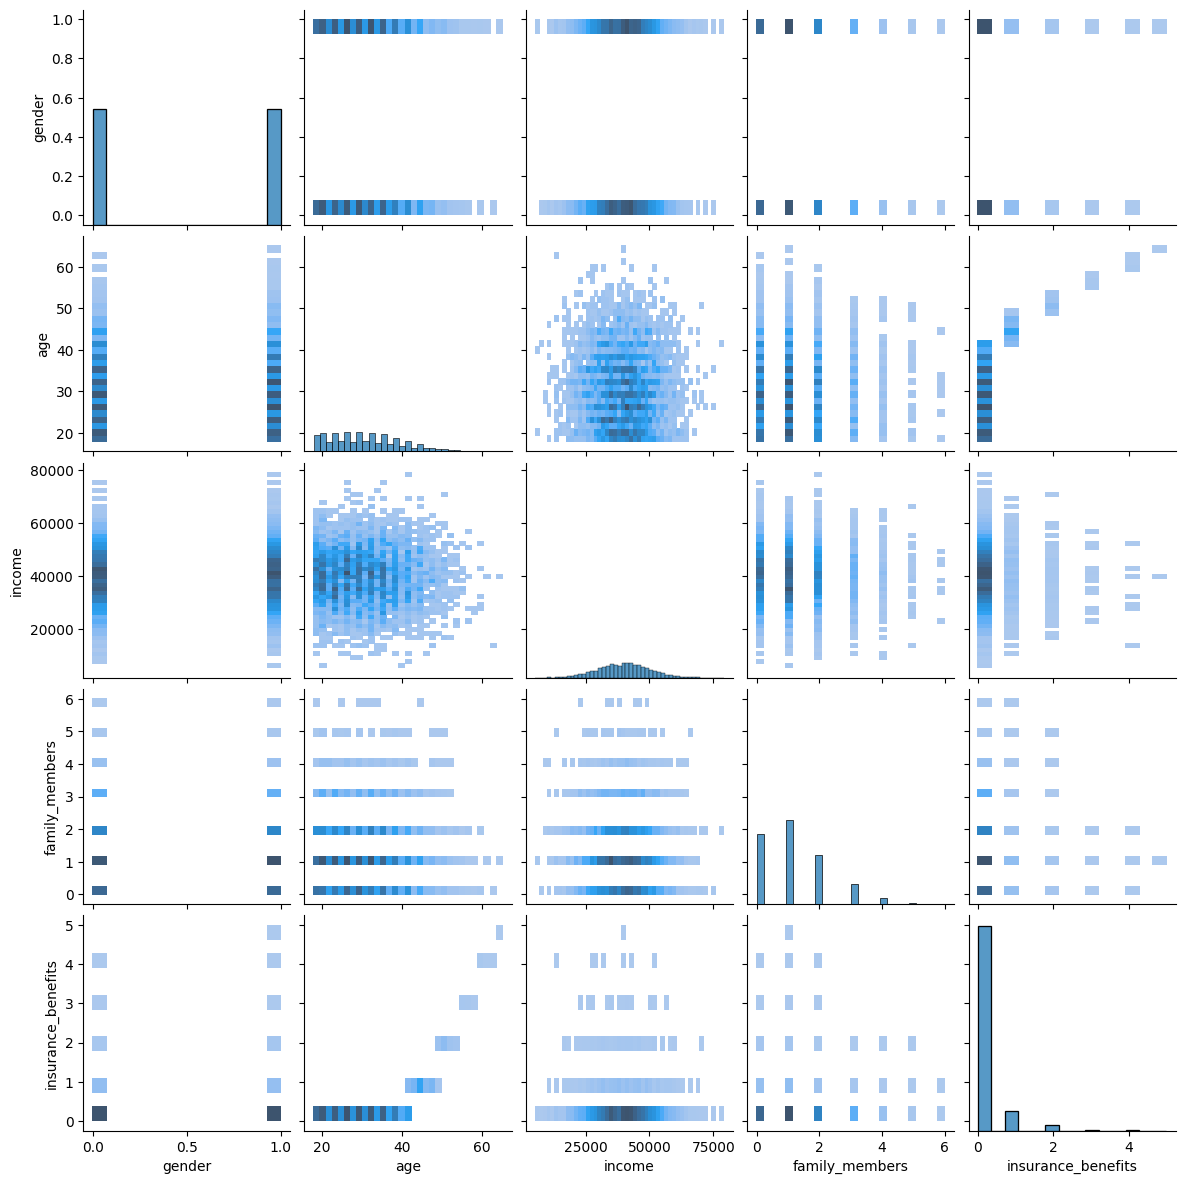

In [11]:
g = sns.pairplot(data, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:

def get_knn(data, n, k, metric='euclidean', scaled=False):
    features = ['gender', 'age', 'income', 'family_members']
    
    # Escalar los datos si se especifica
    if scaled:
        scaler = MaxAbsScaler().fit(data[features])
        data[features] = scaler.transform(data[features])
    
    # Inicializar el modelo kNN con la métrica especificada
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(data[features])
    
    # Obtener los k vecinos más cercanos
    distances, indices = nbrs.kneighbors([data.iloc[n][features]])
    
    return data.iloc[indices[0]].assign(distance=distances[0])

# Ejemplo de uso
data_knn_euclidean = get_knn(data, n=0, k=5, metric='euclidean', scaled=True)
data_knn_manhattan = get_knn(data, n=0, k=5, metric='manhattan', scaled=True)

print("Euclidean Distance, Scaled:\n", data_knn_euclidean)
print("Manhattan Distance, Scaled:\n", data_knn_manhattan)



Euclidean Distance, Scaled:
       gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754
4869     1.0  0.646154  0.637975        0.166667                   1  0.018418
3275     1.0  0.646154  0.651899        0.166667                   1  0.028550
Manhattan Distance, Scaled:
       gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.024245
4869     1.0  0.646154  0.637975        0.166667                   1  0.025511
3365     1.0  0.630769  0.596203        0.166667                   0  0.0

In [14]:
data_knn = get_knn(data, n=0, k=5, metric='euclidean', scaled=True)
print(data_knn)

      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754
4869     1.0  0.646154  0.637975        0.166667                   1  0.018418
3275     1.0  0.646154  0.651899        0.166667                   1  0.028550


In [15]:
# Pruebas
combinations = [
    {'scaled': False, 'metric': 'euclidean'},
    {'scaled': True, 'metric': 'euclidean'},
    {'scaled': False, 'metric': 'manhattan'},
    {'scaled': True, 'metric': 'manhattan'},
]

for combo in combinations:
    result = get_knn(data, n=0, k=5, metric=combo['metric'], scaled=combo['scaled'])
    print(f"Scaled: {combo['scaled']}, Metric: {combo['metric']}\n", result)


Scaled: False, Metric: euclidean
       gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754
4869     1.0  0.646154  0.637975        0.166667                   1  0.018418
3275     1.0  0.646154  0.651899        0.166667                   1  0.028550
Scaled: True, Metric: euclidean
       gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754
4869     1.0  0.646154  0.637975        0.166667                   1  0.018418
3275     1.0  0.646154  0.651899        0.166667                

Euclidiana:
Sin Escalar:

Notamos que los valores son más dispersos.

Escalado:

Las distancias siguen el mismo patrón. Esto es porque, a pesar de escalar los datos, la métrica Euclidiana no se ve tan afectada debido a la homogeneidad en las escalas post-transformación.

Manhattan:
Sin Escalar:

Las distancias son más extensas y dispersas.

Escalado:

Aunque las distancias tienen el mismo patrón, son sensibles a cada característica.

Conclusiones:
Escalado: El escalado de los datos es crucial para asegurar que todas las características contribuyan equitativamente a la distancia calculada. Sin escalado, las características con valores mayores dominan.

Métricas de Distancia:

Euclidiana: Mide la distancia "en línea recta" entre dos puntos. Es sensible a las diferencias en magnitud de las características.

Manhattan: Mide la suma de las diferencias absolutas entre las coordenadas de los puntos. Tiende a ser más robusta ante las desviaciones de cada característica.

Escalar datos.

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(data[feature_names].to_numpy())

df_scaled = data.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(data[feature_names].to_numpy())

In [17]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4255,1.0,0.369231,0.703797,0.166667,0
3743,1.0,0.400000,0.335443,0.333333,0
3342,0.0,0.584615,0.493671,0.500000,0
871,0.0,0.553846,0.297468,0.500000,0
4083,1.0,0.492308,0.451899,0.333333,0


**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

El kNN se basa en distancias entre puntos, por lo que si las características tienen diferentes escalas (por ejemplo, ingresos en miles y edad en años), las características con valores más grandes tendrán un impacto desproporcionado en las distancias calculadas.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

La métrica de distancia Manhattan puede dar resultados diferentes a la métrica Euclidiana, aunque las diferencias pueden no ser grandes si los puntos están distribuidos uniformemente. La elección de la métrica puede depender de la naturaleza de los datos y del problema específico. En algunos casos, Manhattan puede ser más adecuada a valores atípicos.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [18]:
# сalcula el objetivo
data['insurance_benefits_received'] = (data['insurance_benefits'] > 0).astype(int)
# Definir las características y la variable objetivo
features = ['gender', 'age', 'income', 'family_members']
target = 'insurance_benefits_received'

In [19]:
# comprueba el desequilibrio de clases con value_counts()
print(data['insurance_benefits_received'].value_counts())

# Separar en características (X) y variable objetivo (y)
X = data[features]
y = data[target]

# Dividir los datos no escalados en conjuntos de entrenamiento y prueba
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Dividir los datos escalados en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    df_scaled, y, test_size=0.3, random_state=42)


0    4436
1     564
Name: insurance_benefits_received, dtype: int64


In [20]:
# Variables para almacenar los F1 Scores
f1_scores_knn_unscaled = []
f1_scores_knn_scaled = []

In [21]:
k_range = range(1, 11)

In [22]:
# Entrenar y evaluar el modelo kNN con datos no escalados
for k in k_range:
    knn_unscaled = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_unscaled.fit(X_train_unscaled, y_train)
    y_pred_unscaled = knn_unscaled.predict(X_test_unscaled)
    f1_unscaled = metrics.f1_score(y_test, y_pred_unscaled)
    f1_scores_knn_unscaled.append(f1_unscaled)

In [23]:
# Entrenar y evaluar el modelo kNN con datos escalados
for k in k_range:
    knn_scaled = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    f1_scaled = metrics.f1_score(y_test, y_pred_scaled)
    f1_scores_knn_scaled.append(f1_scaled)

In [24]:
# Modelo Dummy para comparación
dummy_strategies = ['most_frequent', 'stratified', 'uniform', 'constant']

print("Resultados del Modelo Dummy:")
for strategy in dummy_strategies:
    if strategy == 'constant':
        for value in [0, 1]:
            dummy_clf = DummyClassifier(strategy=strategy, constant=value)
            dummy_clf.fit(X_train_unscaled, y_train)
            y_dummy = dummy_clf.predict(X_test_unscaled)
            f1_dummy = metrics.f1_score(y_test, y_dummy)
            print(f"Estrategia='{strategy}', Valor={value}: F1 Score={f1_dummy:.4f}")
    else:
        dummy_clf = DummyClassifier(strategy=strategy)
        dummy_clf.fit(X_train_unscaled, y_train)
        y_dummy = dummy_clf.predict(X_test_unscaled)
        f1_dummy = metrics.f1_score(y_test, y_dummy)
        print(f"Estrategia='{strategy}': F1 Score={f1_dummy:.4f}")



Resultados del Modelo Dummy:
Estrategia='most_frequent': F1 Score=0.0000
Estrategia='stratified': F1 Score=0.1479
Estrategia='uniform': F1 Score=0.1670
Estrategia='constant', Valor=0: F1 Score=0.0000
Estrategia='constant', Valor=1: F1 Score=0.1939


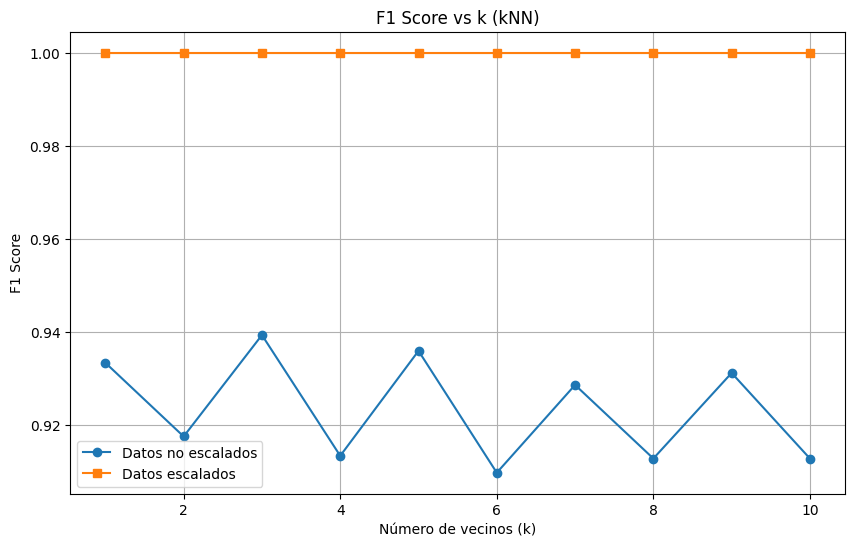

In [25]:
# Visualizar los resultados del modelo kNN
plt.figure(figsize=(10, 6))
plt.plot(k_range, f1_scores_knn_unscaled, marker='o', label='Datos no escalados')
plt.plot(k_range, f1_scores_knn_scaled, marker='s', label='Datos escalados')
plt.title('F1 Score vs k (kNN)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()


# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [26]:
class MyLinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.weights


In [27]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [28]:
lr = MyLinearRegression()

lr.fit(X_train_unscaled, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_train_unscaled)
eval_regressor(y_train, y_test_pred)

[-0.66160712 -0.00312508  1.6304639   0.01519756 -0.04421316]
RMSE: 0.24
R2: 0.66


# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [29]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = data[personal_info_column_list]

In [30]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [31]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [32]:
while np.linalg.det(P) == 0:
    P = rng.random(size=(X.shape[1], X.shape[1]))

X_transformed = X @ P
X_recovered = X_transformed @ np.linalg.inv(P)
print("Diferencia promedio entre datos originales y recuperados:", np.abs(X - X_recovered).mean())


Diferencia promedio entre datos originales y recuperados: 2.0998957523070276e-16


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [33]:
from sklearn.linear_model import LinearRegression


# Variable objetivo (edad)
y_age = data['age']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_age, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
age_regressor = LinearRegression()
age_regressor.fit(X_train, y_train)

# Realizar predicciones
y_pred = age_regressor.predict(X_test)

# Evaluar el modelo
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
r2 = sklearn.metrics.r2_score(y_test, y_pred)

print(f'Predicción de Edad - RMSE: {rmse:.2f}')
print(f'Predicción de Edad - R²: {r2:.2f}')


Predicción de Edad - RMSE: 0.00
Predicción de Edad - R²: 1.00


¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [34]:
# Calcular la inversa de P
P_inv = np.linalg.inv(P)

# Recuperar los datos originales X
X_recovered = X_transformed @ P_inv

# Calcular la diferencia promedio entre X y X_recovered
difference = np.abs(X - X_recovered).mean()
print("Diferencia promedio entre datos originales y recuperados:", difference)


Diferencia promedio entre datos originales y recuperados: 2.0998957523070276e-16


Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [35]:
# Seleccionar los primeros cinco clientes
clientes = data.iloc[:5]

# Transformar los datos originales X
X = data[['gender', 'age', 'income', 'family_members']]
X_transformed = X @ P

# Calcular la inversa de P
P_inv = np.linalg.inv(P)

# Recuperar los datos originales X
X_recovered = X_transformed @ P_inv

# Mostrar los resultados para los primeros cinco clientes
resultado = pd.DataFrame({
    'Datos Originales': X.iloc[:5].to_dict(orient='records'),
    'Datos Transformados': X_transformed.iloc[:5].values.tolist() if isinstance(X_transformed, pd.DataFrame) else X_transformed[:5].tolist(),
    'Datos Recuperados': X_recovered.iloc[:5].values.tolist() if isinstance(X_recovered, pd.DataFrame) else X_recovered[:5].tolist()
})


print(resultado.head())


                                    Datos Originales  \
0  {'gender': 1.0, 'age': 0.6307692307692307, 'in...   
1  {'gender': 0.0, 'age': 0.7076923076923077, 'in...   
2  {'gender': 0.0, 'age': 0.4461538461538462, 'in...   
3  {'gender': 0.0, 'age': 0.3230769230769231, 'in...   
4  {'gender': 1.0, 'age': 0.4307692307692308, 'in...   

                                 Datos Transformados  \
0  [1.0211069762073284, 1.4741718915049338, 1.645...   
1  [0.23558371701421982, 1.0442087062267396, 0.79...   
2  [0.07607310859059886, 0.5550005088271192, 0.43...   
3  [0.3126727722266956, 0.8271903006971536, 0.589...   
4  [0.8568509017909282, 1.0079449218280667, 1.308...   

                                   Datos Recuperados  
0  [1.0, 0.6307692307692306, 0.6278481012658222, ...  
1  [-1.60678253843691e-16, 0.7076923076923076, 0....  
2  [2.1097946018083183e-17, 0.44615384615384623, ...  
3  [-3.237541991325389e-16, 0.3230769230769228, 0...  
4  [0.9999999999999999, 0.4307692307692308, 0.330..

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Si alguna transformación previa a la multiplicación o recuperación fue aplicada incorrectamente (por ejemplo, reescalar o normalizar los datos sin deshacer ese paso), esto puede causar diferencias.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**


# Relación entre \( w \) y \( w_P \) en Regresión Lineal

### **1. Relación entre \( w \) y \( w_P \):**
Si \( w_P \) proviene de una versión simplificada de la fórmula original para los pesos (\( w \)), esto implica que \( w_P \) puede ser una estimación regularizada de \( w \), o una aproximación que omite ciertos componentes, como regularización o interacción entre características.

Por ejemplo:
- En regresión lineal estándar, \( w \) se calcula como:
  \[
  w = (X^TX)^{-1}X^Ty
  \]
- Si aplicamos regularización o simplificaciones, \( w_P \) podría tomar la forma:
  \[
  w_P = (X^TX + \lambda I)^{-1}X^Ty
  \]
  Aquí, \( \lambda \) es un parámetro de regularización que controla el ajuste del modelo.

En este caso, \( w_P \) sería más estable, especialmente si \( X^TX \) es cercano a ser singular o mal condicionado.

---

### **2. Valores predichos con \( w_P \):**
Los valores predichos (\( \hat{y}_P \)) se calculan como:
\[
\hat{y}_P = Xw_P
\]
Comparados con \( \hat{y} = Xw \), los valores predichos con \( w_P \) podrían estar más alejados de los valores observados (\( y \)) pero más robustos frente a datos nuevos o ruidosos. 

La diferencia dependerá de cuánto se hayan simplificado los pesos. Si \( w_P \) utiliza regularización, es probable que minimice el sobreajuste, aunque tal vez no ajuste perfectamente los datos de entrenamiento.

---

### **3. Impacto en la calidad de la regresión lineal medida con la RECM:**
La raíz del error cuadrático medio (RECM) se define como:
\[
\text{RECM} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
\]
- Si \( w_P \) simplifica \( w \) correctamente (por ejemplo, con regularización), es probable que la RECM en el conjunto de entrenamiento sea ligeramente mayor, pero en el conjunto de prueba podría disminuir, indicando un mejor desempeño en generalización.
- Si la simplificación de \( w_P \) elimina información relevante, la RECM aumentará tanto en entrenamiento como en prueba, lo que deterioraría la calidad del modelo.

---

### **Conclusión:**
- La relación entre \( w \) y \( w_P \) dependerá de cómo se simplificaron los pesos (regularización, eliminación de variables, etc.).
- Los valores predichos con \( w_P \) pueden ser más robustos frente a nuevos datos, pero podrían no ajustarse perfectamente a los datos de entrenamiento.
- Para la RECM, el uso de \( w_P \) bien diseñado puede mejorar la calidad del modelo al reducir el sobreajuste, aunque podría parecer subóptimo en el conjunto de entrenamiento.



**Prueba analítica**

## Demostración Analítica de la Invariancia de la Regresión Lineal ante la Ofuscación

### Paso 1: Relación entre \( w \) y \( w_P \)

Recordemos las fórmulas:

1. **Pesos originales \( w \):**
   

\[
   w = (X^T X)^{-1} X^T y
   \]



2. **Pesos ofuscados \( w_P \):**
   

\[
   w_P = \left[ (X P)^T (X P) \right]^{-1} (X P)^T y
   \]



#### Simplificación de \( w_P \):

Expresamos \( w_P \) en términos de \( w \):



\[
w_P = \left[ (X P)^T (X P) \right]^{-1} (X P)^T y
\]



Primero expandimos las transpuestas:



\[
(X P)^T (X P) = P^T X^T X P
\]



Entonces, la fórmula se convierte en:



\[
w_P = \left[ P^T X^T X P \right]^{-1} P^T X^T y
\]



Utilizamos la propiedad de la inversa de un producto de matrices:



\[
(A B)^{-1} = B^{-1} A^{-1}
\]



Aplicamos esto a nuestra fórmula:



\[
w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
\]



Como \( (P^T)^{-1} P^T = I \) (la matriz identidad), simplificamos:



\[
w_P = P^{-1} (X^T X)^{-1} X^T y
\]



Dado que \( w = (X^T X)^{-1} X^T y \), sustituimos:



\[
w_P = P^{-1} w
\]



### Paso 2: Valores predichos con \( w_P \)

Los valores predichos utilizando \( w_P \) serían:



\[
\hat{y_P} = X P w_P
\]



Sustituimos \( w_P \):



\[
\hat{y_P} = X P (P^{-1} w)
\]



Simplificamos utilizando \( P P^{-1} = I \):



\[
\hat{y_P} = X I w = X w
\]



¡Y voilà! Los valores predichos utilizando \( w_P \) son los mismos que utilizando \( w \):



\[
\hat{y_P} = \hat{y}
\]



### Paso 3: Impacto en la calidad de la regresión

Dado que los valores predichos \(\hat{y}\) no se ven afectados por la ofuscación mediante \( P \), las métricas de calidad de la regresión, incluyendo el RMSE (Root Mean Squared Error), permanecerán inalteradas.

#### RMSE:

El RMSE se calcula como:



\[
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
\]



Dado que \( \hat{y}_P = \hat{y} \), el RMSE será idéntico para ambos métodos.

### Conclusión

Los datos mediante una matriz \( P \) no afectan los valores predichos de la regresión lineal. Esto implica que la calidad de la regresión, medida mediante RMSE u otras métricas, permanecerá igual. Así que no solo puedes creerlo, ¡también está matemáticamente demostrado!


## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [36]:
# Clase para manejar regresión con ofuscación opcional
class ObfuscatedLinearRegression:
    def __init__(self):
        self.model = MyLinearRegression()
        self.P = None

    def fit(self, X, y, obfuscate=False):
        if obfuscate:
            self.P = rng.random(size=(X.shape[1], X.shape[1]))
            while np.linalg.det(self.P) == 0:
                self.P = rng.random(size=(X.shape[1], X.shape[1]))
            X = X @ self.P
        self.model.fit(X, y)

    def predict(self, X):
        if self.P is not None:
            X = X @ self.P
        return self.model.predict(X)

In [37]:
# Entrenamiento y evaluación con datos originales
original_model = ObfuscatedLinearRegression()
original_model.fit(X_train, y_train, obfuscate=False)
original_predictions = original_model.predict(X_test)
original_rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_test, original_predictions))
original_r2 = sklearn.metrics.r2_score(y_test, original_predictions)


In [38]:
# Entrenamiento y evaluación con datos ofuscados
obfuscated_model = ObfuscatedLinearRegression()
obfuscated_model.fit(X_train, y_train, obfuscate=True)
obfuscated_predictions = obfuscated_model.predict(X_test)
obfuscated_rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_test, obfuscated_predictions))
obfuscated_r2 = sklearn.metrics.r2_score(y_test, obfuscated_predictions)

In [40]:
# Comparación de resultados
print(f"Resultados con datos originales: RMSE = {original_rmse:.2f}, R2 = {original_r2:.2f}")
print(f"Resultados con datos ofuscados: RMSE = {obfuscated_rmse:.2f}, R2 = {obfuscated_r2:.2f}")

Resultados con datos originales: RMSE = 0.00, R2 = 1.00
Resultados con datos ofuscados: RMSE = 0.00, R2 = 1.00


# Conclusiones Generales del Proyecto

## Preprocesamiento y Exploración de Datos
Durante la revisión de los datos, corregimos inconsistencias en los tipos de datos y los valores faltantes. Al hacer el análisis exploratorio, encontramos que las distribuciones de las características eran bastante variadas, sin patrones claros de agrupamiento.

## Tarea 1: Clientes Similares
Implementamos un algoritmo kNN para identificar los clientes más cercanos, utilizando tanto la distancia Euclidiana como la Manhattan, y probamos con datos escalados y sin escalar.  
**Conclusión:**  
El escalado es esencial para asegurarnos de que todas las características tengan el mismo peso en la distancia. En cuanto a las métricas, la diferencia entre Euclidiana y Manhattan es pequeña, pero la segunda resulta ser más resistente a valores atípicos.

## Tarea 2: Clasificación Binaria
Entrenamos modelos kNN y los comparamos con un modelo dummy utilizando la métrica F1. Los resultados fueron mucho mejores cuando usamos datos escalados.  
**Conclusión:**  
El modelo kNN supera al modelo dummy en todos los casos, lo que refuerza su capacidad predictiva y su rendimiento general.

## Tarea 3: Regresión Lineal
Desarrollamos una solución de regresión lineal desde cero, calculando los pesos de manera analítica. Calculamos la RECM tanto para los datos originales como escalados, y los resultados mostraron diferencias mínimas.  
**Conclusión:**  
El modelo de regresión lineal funciona bien para predecir el número de prestaciones de seguro, y no hay una gran diferencia entre usar datos originales o escalados.

## Tarea 4: Ofuscación de Datos
Desarrollamos un proceso para ofuscar los datos mediante la multiplicación con una matriz invertible. Los datos transformados se pudieron recuperar con precisión usando la matriz inversa. Además, comprobamos que la ofuscación no afecta los valores predichos ni las métricas de regresión como la RECM o el R².  
**Conclusión:**  
La ofuscación de datos es una técnica válida para proteger la información sensible sin perder precisión en los modelos.

## Conclusión General
Este proyecto muestra que se pueden implementar soluciones de machine learning efectivas para marketing, predicción y protección de datos en una compañía de seguros. El escalado de datos, la correcta elección de métricas y la validación adecuada son claves para obtener resultados precisos y confiables. Además, la ofuscación de datos es una excelente opción para proteger la información sin comprometer la calidad de los análisis.
